# Analysis

Query the database based on vaccination provided and analysis with graph

In [1]:
import sys
sys.path.append('..')

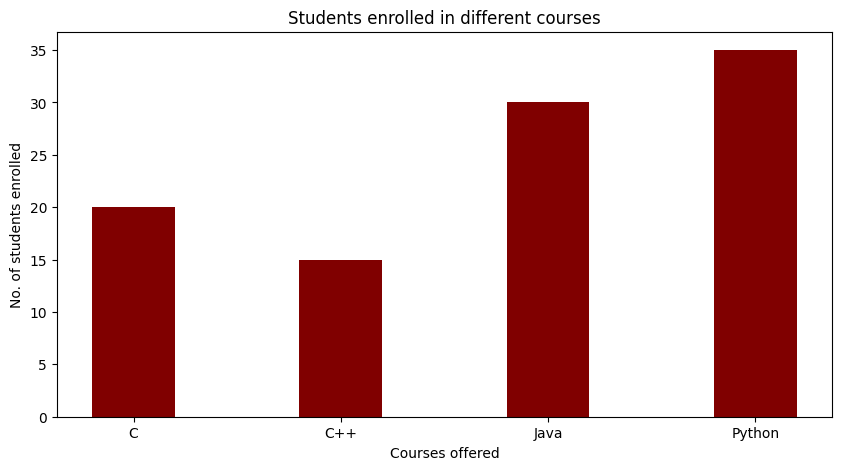

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


# creating the dataset
data = {'C':20, 'C++':15, 'Java':30, 
		'Python':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon', 
		width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


Read all the query in Queries.sql file

In [2]:
from scripts.csvRW import read_sql
from scripts.query import queryDB

import pandas as pd
import plotly.express as px

queries = read_sql('../Queries.sql')

Fetch all country ISO code for later reference

In [3]:
countryIso  = queryDB("SELECT iso_code, location FROM country;")
countryIso = dict(map(reversed, countryIso))

#### Graphical understanding of observation for vaccination administered in between two month.

List the months, the total number of vaccines administered in each observation months in each of all countries.

In [4]:
row  = queryDB(queries[0])

increasedVaccineCount = []
for data in row:
    increasedVaccineCount.append((countryIso[data[1]], float(data[5]) * -1))

# Create a dataFrame
df = pd.DataFrame(increasedVaccineCount, columns=['Country', 'Change'])

fig = px.choropleth(
    df,
    locations='Country',        # Column with country codes
    color='Change',             # Column with data to color the map
    hover_name='Country',       # Column to display on hover
    color_continuous_scale=px.colors.sequential.Plasma,
    title=f'Administered vaccine between {row[0][0]} and {row[0][3]}'
)

fig.show()

In [5]:
row  = queryDB(queries[1])

# Create DataFrame
df = pd.DataFrame(row,columns=['Country','Month', 'Cummulative' ])

# Create scatter plot
fig = px.scatter(
    df,
    x='Month',          
    y='Cummulative',
    color='Country',
    hover_name='Country',
    title='Cummulative vaccine of a country above the average in month'
)

# Show the plot
fig.show()


In [6]:
row = queryDB(queries[2])

vaccinationByCountry = {}
for vaccine, country in row:
    if vaccine in vaccinationByCountry:
        vaccinationByCountry[vaccine] += 1
    else:
        vaccinationByCountry[vaccine] = 1

# Create DataFrame
df = pd.DataFrame(vaccinationByCountry.items(), columns=['Vaccine', 'Count'])

# Create pie chart
fig = px.pie(
    df,
    names='Vaccine',
    values='Count',
    title='Vaccine Distribution'
)

# Show the plot
fig.show()


In [7]:
row = queryDB(queries[3])

df = pd.DataFrame(row, columns=['Country', 'URL', 'Vaccination'])

# Create bubble chart
fig = px.scatter(
    df,
    y='Vaccination',
    size='Vaccination',
    color='Country',
    hover_name='Country',
    title='Total Vaccine administered by each country'
)

# Remove x-axis tick labels
fig.update_xaxes(showticklabels=False)
# Set title for the x-axis
fig.update_xaxes(title_text='Country')
fig.update_yaxes(range=[1e10, None]) 

# Show the plot
fig.show()

In [8]:
row = queryDB(queries[4])

# Convert the list of tuples to a DataFrame
df = pd.DataFrame(row, columns=['Date', 'United States', 'Wales', 'Canada', 'Denmark'])

# Melt the DataFrame to have the 'Date' column as x-axis, and 'value' as y-axis, and 'variable' as line groups
df_melted = pd.melt(df, id_vars=['Date'], var_name='Country', value_name='Value')

# Create line chart
fig = px.line(
    df_melted,
    x='Date',
    y='Value',
    color='Country',
    title='People fully vaccinated',
    labels={'Value': 'Count'}
)

fig.update_yaxes(type='log') 
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Count in millions')
# Show the plot
fig.show()